# Importiere Daten


In [1]:
import numpy as np
import pandas as pd
import geopandas as gp
import xarray as xr
import datetime
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import os as os

In [2]:
# Customize the default plotting style
plt.rcParams['figure.figsize'] = (8, 6)  # Set the default figure size
plt.rcParams['axes.labelsize'] = 14      # Set the default label font size
plt.rcParams['axes.titlesize'] = 16      # Set the default title font size
plt.rcParams['xtick.labelsize'] = 12     # Set the default x-axis tick font size
plt.rcParams['ytick.labelsize'] = 12     # Set the default y-axis tick font size
plt.rcParams['lines.linewidth'] = 2.0    # Set the default line width
plt.rcParams['lines.markersize'] = 8     # Set the default marker size
plt.rcParams['legend.fontsize'] = 12     # Set the default legend font size
plt.rcParams['axes.grid'] = True         # Enable grid lines by default

# Now, all subsequent plots in your script will use these settings


## Funktionen definieren

In [3]:
# def select_every_12th_with_start(arr, start_index):
#     if start_index < 1 or start_index > 12:
#         raise ValueError("Start index must be between 1 and 11")

#     selected_elements = []
#     for i in range(start_index - 1, len(arr), 12):
#         selected_elements.append(arr[i])
    
#     return selected_elements

def linear_reg(x, m, t):
    return m*x + t

# def generate_counting_array(length):
#     return np.arange(length)

    
# def selecting_month(arr, start_index, start_date, end_date):
#     if start_index < 1 or start_index > 12:
#         raise ValueError("Start index must be between 1 and 12")  # Change 11 to 12

#     selected_elements = []
#     for i in range(start_index - 1, len(arr), 12):
#         selected_elements.append(arr[i])

#     tmp = xr.concat(selected_elements, dim="time")  # Concatenate the selected elements
#     tmp = tmp.sel(time=slice(start_date, end_date))
    
#     return tmp


# def fit_count(arr):
#     return generate_counting_array(len(arr))



# def selecting_tf(arr,start_time, end_time):
#     return arr.sel(time = slice(start_time, end_time))

# def LinReg_All_Month(arr, time_start_displayed, time_start_fit, time_end, Name):
#     # Create an empty DataFrame
#     columns = ['month', 'slope', 'offset', 'var']
#     parameters_df = pd.DataFrame(columns=columns)

#     # Set 'month' as the index
#     parameters_df.set_index('month', inplace=True)

#     for month in range(1,13):
#         # Select data
#         y_data = selecting_month(arr,month, time_start_displayed, time_end)

#         #Selecting fitting data
#         y_temp = selecting_tf(y_data, time_start_fit, time_end)
#         x_temp = fit_count(y_temp)

#         #Fitting
#         par_LinReg, cov_LinReg = curve_fit(linear_reg, x_temp ,y_temp)

#         #Producing fitting output
#         y_fit = linear_reg(x_temp, *par_LinReg)
#         x_fit = y_temp['time'].values


        # #plt.plot(y_temp['time'].values, y_temp)
        # plt.plot(y_data['time'].values, y_data, marker = 'x', ls = '', label = 'data')
        # plt.plot(x_fit, y_fit, alpha = .5, label = 'LinReg')

        #Calculating Varriance

        # # VarDeltaT = np.var(y_temp-y_fit)

        # #Adding to df
        # new_entry = {'slope': par_LinReg[0]*50, 'offset': par_LinReg[1], 'var': VarDeltaT.values}
        # parameters_df.loc[str(month)] = new_entry


        # plt.xlabel('time')
        # plt.ylabel('DTR')

        # plt.title(Name + 'entire pol. reg. in month ' + str(month))

        # plt.xlim(time_values[800], time_values[-1])
        # plt.legend()
        # # Add a subtle background color
        # plt.gca().set_facecolor((0.95, 0.95, 0.95))

        # # Display the plot
        # plt.tight_layout()
        # plt.savefig(Ordner +'Bilder/LinReg/LinReg_'+Name+'_Month_'+ str(month)+'.png', dpi = 300)
        # plt.clf()
    return parameters_df

def generate_cosine_weight(angles):
    temp = np.cos(np.radians(angles))
    cosine_values = temp/np.sum(temp)
    return cosine_values

### Gewichtung der Daten

In [4]:
def weigth(arr):
    return np.multiply(generate_cosine_weight(arr['lat'].values), arr)

# def TMax_selection(grad_min, grad_max):
#     selected_data = TMax_Lat.sel(lat=slice(grad_min, grad_max)).tmx
    
    # if np.isnan(selected_data).any():
    #     print('There is a Nan-Entry in your Max data selected!')
    #     return None
    # else:
    #     weights = generate_cosine_weight(selected_data['lat'].values)
    #     result = np.dot(selected_data, weights)
    #     result_data_array = xr.DataArray(result, coords={'time': selected_data['time']}, dims=['time'])
    #     return result_data_array

# def TMin_selection(grad_min, grad_max):
#     selected_data = TMin_Lat.sel(lat=slice(grad_min, grad_max))
    
#     if np.isnan(selected_data.tmn).any():
#         print('There is a Nan-Entry in your Min data selected!')
#         return None
#     else:
#         weights = generate_cosine_weight(selected_data['lat'].values)
#         result = np.dot(selected_data.tmn, weights)
#         result_data_array = xr.DataArray(result, coords={'time': selected_data['time']}, dims=['time'])
#         return result_data_array

# def temperature_diff_selection(grad_min, grad_max):
#     tmax_result = TMax_selection(grad_min, grad_max)
#     tmin_result = TMin_selection(grad_min, grad_max)
    
#     if tmax_result is not None and tmin_result is not None:
#         return tmax_result - tmin_result
#     else:
#         return None


In [5]:
month_label = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

legend_colors = plt.cm.tab20(range(12))


## Speicherorte verwalten

## Daten importieren

In [6]:
# File paths
TMin_file = 'data/cru_ts4.07.1901.2022.tmn.dat.nc/cru_ts4.07.1901.2022.tmn.dat.nc'
TMax_file = 'data/cru_ts4.07.1901.2022.tmx.dat.nc/cru_ts4.07.1901.2022.tmx.dat.nc'
TAvg_file = 'data\cru_ts4.07.1901.2022.tmp.dat.nc\cru_ts4.07.1901.2022.tmp.dat.nc'

# Load datasets
TMin = xr.open_dataset(TMin_file)
TMax = xr.open_dataset(TMax_file)
TAvg =  xr.open_dataset(TAvg_file)

## Differenz berechnen

In [7]:
TMin_Lat = TMin.mean('lon')
TMax_Lat = TMax.mean('lon')
TAvg_Lat = TAvg.mean('lon')

In [8]:
time_values = TMax['time'].values

In [9]:
TMin_Lat_tot = TMin_Lat.sel(lat = slice(67,90)).mean('lat')
TMax_Lat_tot = TMax_Lat.sel(lat = slice(67,90)).mean('lat')
TAvg_Lat_tot = TAvg_Lat.sel(lat = slice(67,90)).mean('lat')

In [10]:
temperature_difference = TMax.tmx - TMin.tmn   # Normale Differenz fü jeden Punkt
temperature_difference_Lat = TMax_Lat.tmx- TMin_Lat.tmn # Creating lateral difference
temperature_difference_Pol = TMax_Lat_tot.tmx- TMin_Lat_tot.tmn

In [11]:
monthly_mean_DTR = temperature_difference_Pol.resample(time='M').mean()
monthly_mean_TAvg = TAvg_Lat_tot.tmp.resample(time='M').mean()


In [12]:

monthly_mean_DTR['month'] = monthly_mean_DTR['time'].dt.month
monthly_mean_TAvg['month'] = monthly_mean_TAvg['time'].dt.month

c:\Users\leonh\AppData\Local\Programs\Python\Python310\lib\site-packages\xarray\core\accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


## Generiere Unterteilungen des Nordpols (Ringe)

In [13]:
# Creating dict with different averages
TAvg_mean_dict = {}

slices = [(66, 70), (70, 75), (75, 80), (80, 84)]

# Perform the slicing and calculation for each slice
for start, end in slices:
    # Perform the slice and calculate the mean along the 'lat' dimension
    sliced_data = TAvg_Lat.tmp.sel(lat=slice(start, end)).mean('lat')
    TAvg_mean_dict[f'{start}-{end}'] = sliced_data

# Creating dict with different averages
DTR_mean_dict = {}

slices = [(66, 70), (70, 75), (75, 80), (80, 84)]

# Perform the slicing and calculation for each slice
for start, end in slices:
    # Perform the slice and calculate the mean along the 'lat' dimension
    sliced_data = temperature_difference_Lat.sel(lat=slice(start, end)).mean('lat')
    DTR_mean_dict[f'{start}-{end}'] = sliced_data


Plotten

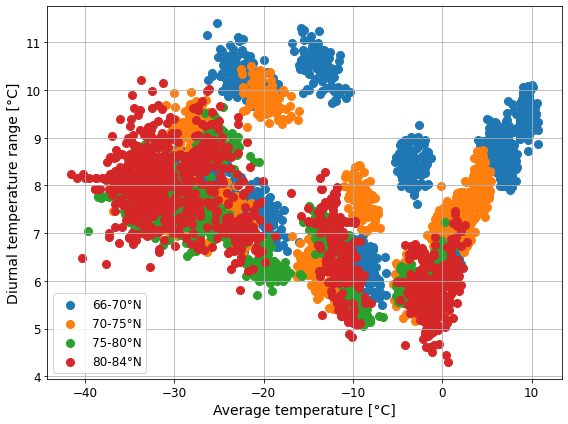

In [14]:
# Extract the keys and values from TAvg_mean_dict and DTR_mean_dict
ta_keys = list(TAvg_mean_dict.keys())

legend_handles = []

for i in ta_keys:
    plt.scatter(TAvg_mean_dict[i], DTR_mean_dict[i], label = i + '°N' )

plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Average temperature [°C]')
plt.ylabel('Diurnal temperature range [°C]')


# plt.savefig('Bilder/DTR_latex/DTR_yearlyMean_diffrentLat_TAvg_scatter.pdf')
# plt.savefig('Bilder/DTR_latex/DTR_yearlyMean_diffrentLat_TAvg_scatter.png')
plt.legend()

plt.tight_layout()
plt.show()


## Plots Yearly trends

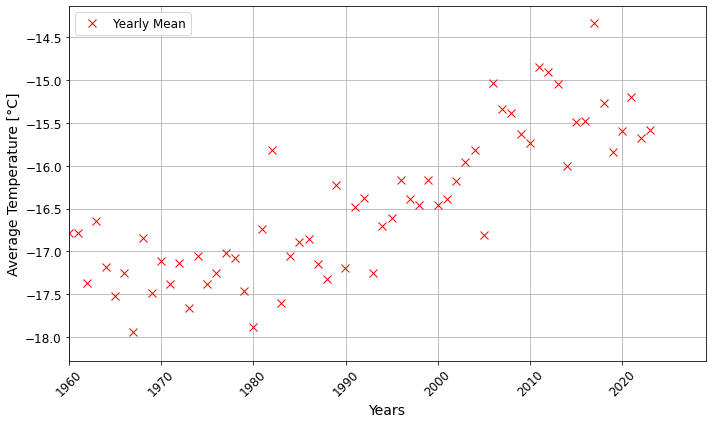

In [15]:
yearly_mean_TAvg = TAvg_Lat_tot.tmp.resample(time='Y').mean()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Plot the data with a line style and add labels
ax.plot(yearly_mean_TAvg.time, yearly_mean_TAvg, marker='x', linestyle='',  color='r', label='Yearly Mean')

# Add labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Average Temperature [°C]')
#ax.set_title('Diurnal Temperature Range Over Time')

# Add gridlines
ax.grid(True)

# Add a legend
ax.legend()

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.xlim(pd.to_datetime('1960',))
# Show the plot
plt.tight_layout()  # Ensures that labels fit within the figure
plt.show()



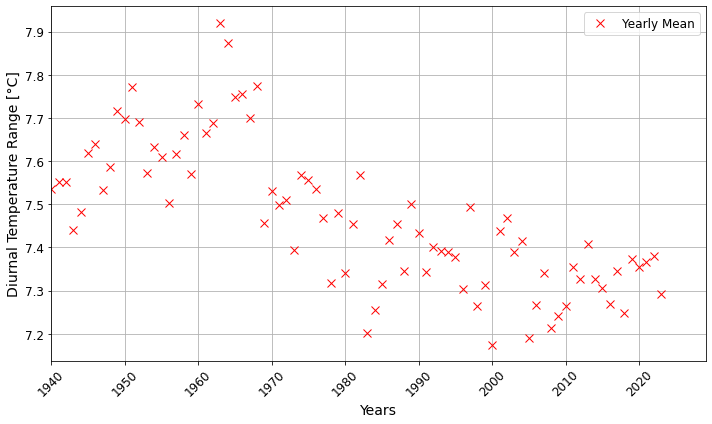

In [16]:
yearly_mean_DTR = temperature_difference_Pol.resample(time='Y').mean()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Plot the data with a line style and add labels
ax.plot(yearly_mean_DTR.time, yearly_mean_DTR, marker='x', linestyle='',  color='r', label='Yearly Mean')

# Add labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Diurnal Temperature Range [°C]')
#ax.set_title('Diurnal Temperature Range Over Time')

# Add gridlines
ax.grid(True)

# Add a legend
ax.legend()

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.xlim(pd.to_datetime('1940',))
# Show the plot
plt.tight_layout()  # Ensures that labels fit within the figure

# plt.savefig('Bilder/DTR_latex/DTR_yearlyMean_years.pdf')
# plt.savefig('Bilder/DTR_latex/DTR_yearlyMean_years.png')
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


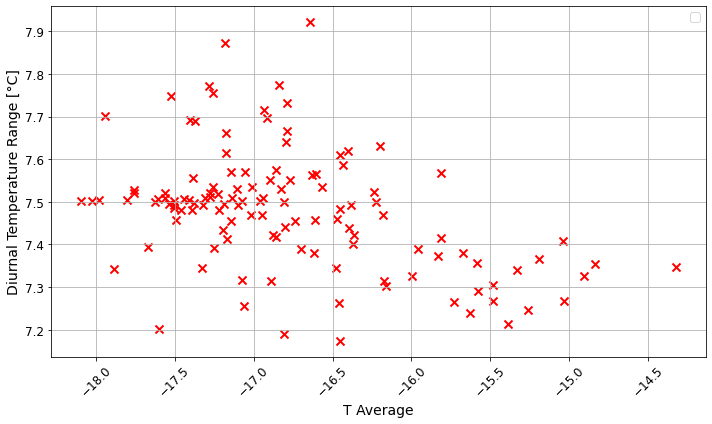

In [32]:
yearly_mean_DTR = temperature_difference_Pol.resample(time='Y').mean()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Plot the data with a line style and add labels
ax.scatter(yearly_mean_TAvg, yearly_mean_DTR, marker='x',  color='r') #, label='Yearly Mean')

# Add labels and title
ax.set_xlabel('T Average')
ax.set_ylabel('Diurnal Temperature Range [°C]')
#ax.set_title('Diurnal Temperature Range Over Time')

# Add gridlines
ax.grid(True)

# Add a legend
ax.legend()

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

#plt.xlim(pd.to_datetime('1940',))
# Show the plot
plt.tight_layout()  # Ensures that labels fit within the figure

# plt.savefig('Bilder/DTR_latex/DTR_yearlyMean_years.pdf')
# plt.savefig('Bilder/DTR_latex/DTR_yearlyMean_years.png')
plt.show()



## Monthly trends

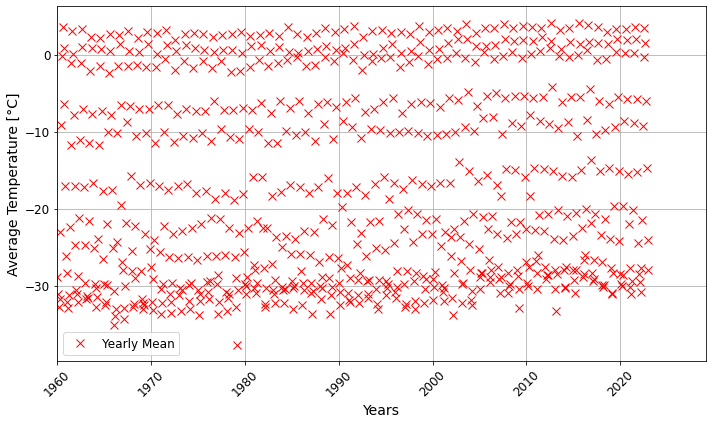

In [17]:
# monthly_mean_TAvg = TAvg_Lat_tot.tmp.resample(time='M').mean()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Plot the data with a line style and add labels
ax.plot(monthly_mean_TAvg.time, monthly_mean_TAvg, marker='x', linestyle='',  color='r', label='Yearly Mean')

# Add labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Average Temperature [°C]')
#ax.set_title('Diurnal Temperature Range Over Time')

# Add gridlines
ax.grid(True)

# Add a legend
ax.legend()

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.xlim(pd.to_datetime('1960',))
# Show the plot
plt.tight_layout()  # Ensures that labels fit within the figure
plt.show()



<xarray.DataArray (time: 1464)>
array([7.946848 , 8.034681 , 8.786755 , ..., 5.932521 , 6.9754944,
       7.8201313], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-31 1901-02-28 ... 2022-12-31
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12


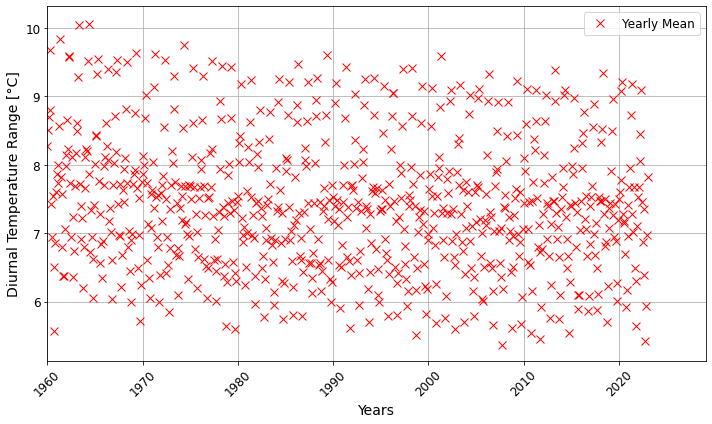

In [18]:
# monthly_mean_DTR = temperature_difference_Pol.resample(time='M').mean()

print(monthly_mean_DTR)
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figsize as needed

# Plot the data with a line style and add labels
ax.plot(monthly_mean_DTR.time, monthly_mean_DTR, marker='x', linestyle='',  color='r', label='Yearly Mean')

# Add labels and title
ax.set_xlabel('Years')
ax.set_ylabel('Diurnal Temperature Range [°C]')
#ax.set_title('Diurnal Temperature Range Over Time')

# Add gridlines
ax.grid(True)

# Add a legend
ax.legend()

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.xlim(pd.to_datetime('1960',))
# Show the plot
plt.tight_layout()  # Ensures that labels fit within the figure
plt.show()



In [19]:
monthly_mean_DTR

<xarray.DataArray (time: 1464)>
array([7.946848 , 8.034681 , 8.786755 , ..., 5.932521 , 6.9754944,
       7.8201313], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-31 1901-02-28 ... 2022-12-31
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [20]:
monthly_mean_DTR_dict = {}

for i in range(1, 13):
    # Slice the DataArray for the current month
    month_data = monthly_mean_DTR.where(monthly_mean_DTR['month'] == i, drop=True)
    
    # Add the sliced DataArray to the dictionary with the month as the key
    monthly_mean_DTR_dict[i] = month_data

monthly_mean_TAvg_dict = {}

for i in range(1, 13):
    # Slice the DataArray for the current month
    month_data = monthly_mean_TAvg.where(monthly_mean_TAvg['month'] == i, drop=True)
    
    # Add the sliced DataArray to the dictionary with the month as the key
    monthly_mean_TAvg_dict[i] = month_data

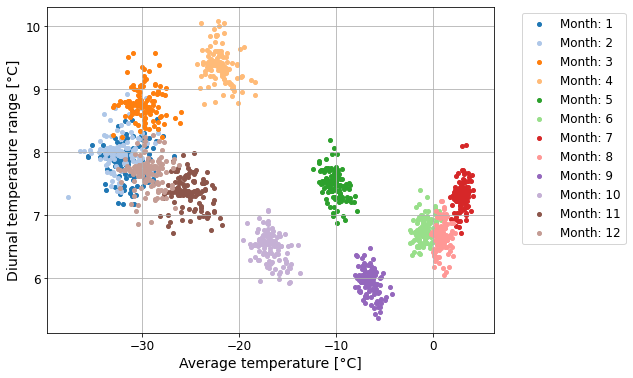

In [21]:


# Create an empty list to store legend handles for custom legend
legend_handles = []

for i in range(1, 13):
    color = legend_colors[i - 1]
    plt.scatter(monthly_mean_TAvg_dict[i], monthly_mean_DTR_dict[i], marker='.', color=color, label='Month: ' + str(i))
    # Create a dummy scatter plot with no markers to represent the legend
    legend_handles.append(plt.scatter([], [], marker='.', color=color, label='Month: ' + str(i)))

# Plot legend outside the plot
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Average temperature [°C]')
plt.ylabel('Diurnal temperature range [°C]')


# plt.savefig('Bilder/DTR_latex/DTR_yearlyMean_TAvg_scatter.pdf')
# plt.savefig('Bilder/DTR_latex/DTR_yearlyMean_TAvg_scatter.png')

plt.show()



## Monthly Trends with Fit

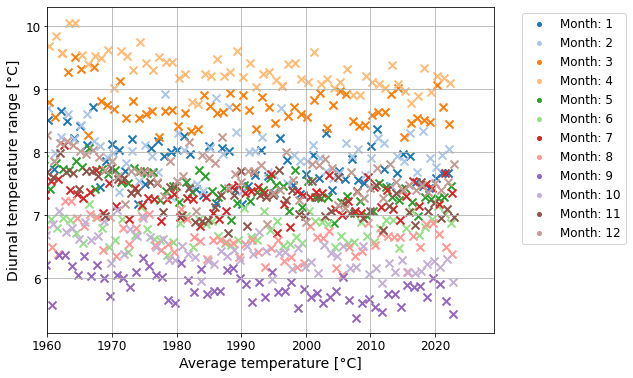

In [22]:
legend_colors = [plt.cm.tab20(i) for i in np.linspace(0, 1, 12)]
legend_colors = plt.cm.tab20(range(12))

# Create an empty list to store legend handles for custom legend
legend_handles = []

for i in range(1, 13):
    color = legend_colors[i - 1]
    plt.scatter(monthly_mean_DTR_dict[i]['time'], monthly_mean_DTR_dict[i], marker='x', color=color, label='Month: ' + str(i))
    # Create a dummy scatter plot with no markers to represent the legend
    legend_handles.append(plt.scatter([], [], marker='.', color=color, label='Month: ' + str(i)))

# Plot legend outside the plot
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Average temperature [°C]')
plt.ylabel('Diurnal temperature range [°C]')

plt.xlim(pd.to_datetime('1960',))

# plt.savefig('Bilder/DTR_latex/DTR_yearlyMean_TAvg_scatter.pdf')
# plt.savefig('Bilder/DTR_latex/DTR_yearlyMean_TAvg_scatter.png')

plt.show()




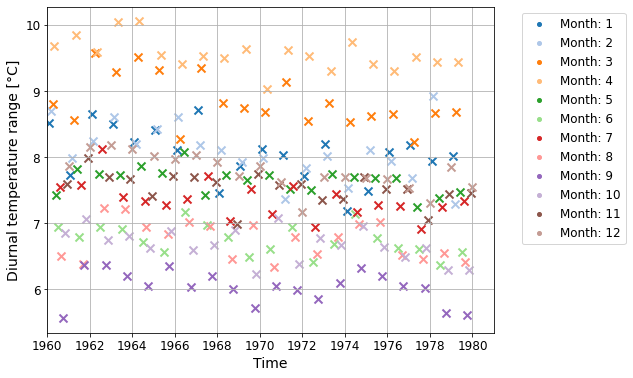

In [23]:


# Create a list of legend colors
legend_colors = plt.cm.tab20(range(12))

# Create an empty list to store legend handles for custom legend
legend_handles = []

for i in range(1, 13):
    color = legend_colors[i - 1]
    # Filter the data for the specified date range (1960-01-01 to 1980-12-31)
    mask = (monthly_mean_DTR_dict[i]['time'] >= pd.to_datetime('1960-01-01')) & (monthly_mean_DTR_dict[i]['time'] <= pd.to_datetime('1980-01-01'))
    plt.scatter(monthly_mean_DTR_dict[i]['time'][mask], monthly_mean_DTR_dict[i][mask], marker='x', color=color, label='Month: ' + str(i))
    # Create a dummy scatter plot with no markers to represent the legend
    legend_handles.append(plt.scatter([], [], marker='.', color=color, label='Month: ' + str(i)))

# Plot legend outside the plot
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Time')
plt.ylabel('Diurnal temperature range [°C]')

# Set x-axis limits to the specified date range
plt.xlim(pd.to_datetime('1960-01-01'), pd.to_datetime('1980-12-31'))

plt.show()


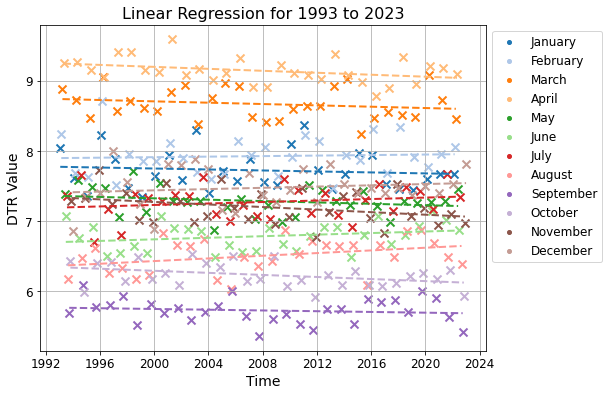

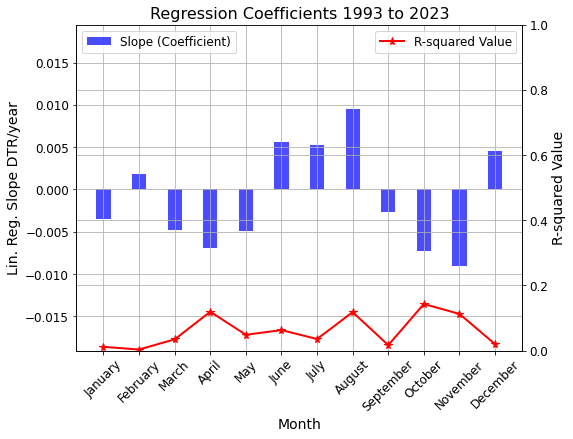

In [70]:
# Create lists to store regression coefficients and R-squared values
regression_coeffs = []
r_squared_values = []

startdate = pd.to_datetime('1993-01-01')
enddate = pd.to_datetime('2023-01-01') 

for i in range(1,13):
    color = legend_colors[i - 1]
    # Filter the data for the specified date range (1960-01-01 to 1980-12-31)
    mask = (monthly_mean_DTR_dict[i]['time'] >= startdate) & (monthly_mean_DTR_dict[i]['time'] <= enddate)
    
    x = np.arange(len(monthly_mean_DTR_dict[i]['time'][mask]))  # Use an index as x values
    y = monthly_mean_DTR_dict[i][mask]

    # Fit a linear regression line
    slope, intercept = np.polyfit(x, y, 1)
    
    # Calculate R-squared
    residuals = y - (slope * x + intercept)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Plot the scatter plot
    plt.scatter(monthly_mean_DTR_dict[i]['time'][mask], y, marker='x', color=color, label= month_label[i-1])
    
    # Plot the regression line
    plt.plot(monthly_mean_DTR_dict[i]['time'][mask], slope * x + intercept, color=color, linestyle='--') #, label='Regression Line')

    # Create a dummy scatter plot with no markers to represent the legend
    legend_handles.append(plt.scatter([], [], marker='.', color=color)) #, label='Month: ' + str(i)))

    # Append regression coefficients and R-squared values to lists
    regression_coeffs.append((slope, intercept))
    r_squared_values.append(r_squared)

# Show the legend
plt.legend(handles=legend_handles, labels=month_label, loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Time')
plt.ylabel('DTR Value')
plt.title('Linear Regression for ' + str(startdate.year) +' to ' + str(enddate.year))
plt.show()



# # Print regression coefficients and R-squared values
# for i, (slope, intercept) in enumerate(regression_coeffs):
#     print(f'Month {i+1}:')
#     print(f'  Slope (Coefficient): {slope}')
#     print(f'  Intercept: {intercept}')
#     print(f'  R-squared Value: {r_squared_values[i]}')

slopes = [slope for slope, _ in regression_coeffs]
r_squared_values = np.array(r_squared_values)  # Convert to numpy array for easier manipulation

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Create x-values for the bars
x = np.arange(len(slopes))

# Plot the slopes as bars on the primary y-axis
ax1.bar(x, slopes, width=0.4, color='b', alpha=0.7, label='Slope (Coefficient)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Lin. Reg. Slope DTR/year')
ax1.set_ylim(min(slopes) - 0.01, max(slopes) + 0.01)

# Rotate the x-axis tick labels
ax1.set_xticks(x)
ax1.set_xticklabels([month_label[i] for i in range(len(slopes))], rotation=45)  # Rotate the labels here
ax1.legend(loc='upper left')

# Create a secondary y-axis for R-squared values on the right
ax2 = ax1.twinx()
ax2.plot(x, r_squared_values, 'r*-', label='R-squared Value')
ax2.set_ylabel('R-squared Value')
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

# Show the plot
plt.title('Regression Coefficients ' + str(startdate.year) +' to ' + str(enddate.year))
plt.show()


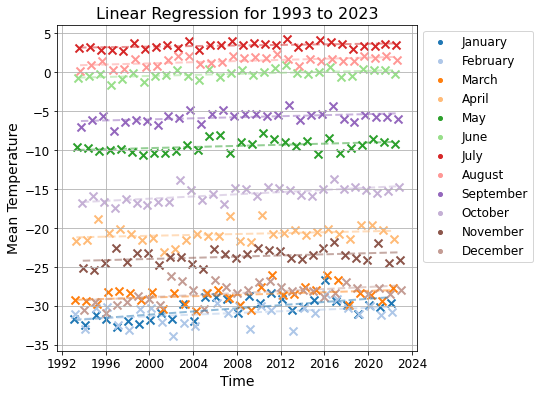

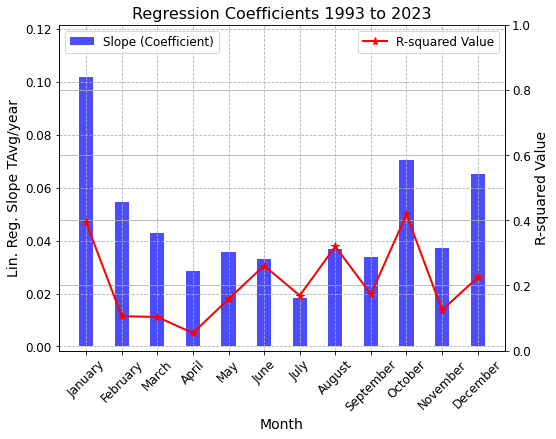

In [71]:


# Create lists to store legend handles
legend_handles = []

# Create lists to store regression coefficients and R-squared values
regression_coeffs = []
r_squared_values = []

startdate = pd.to_datetime('1993-01-01')
enddate = pd.to_datetime('2023-01-01')

for i in range(1, 13):
    color = legend_colors[i - 1]
    # Filter the data for the specified date range (1960-01-01 to 1980-12-31)
    mask = (monthly_mean_TAvg_dict[i]['time'] >= startdate) & (monthly_mean_TAvg_dict[i]['time'] <= enddate)
    
    x = np.arange(len(monthly_mean_TAvg_dict[i]['time'][mask]))  # Use an index as x values
    y = monthly_mean_TAvg_dict[i][mask]

    # Fit a linear regression line
    slope, intercept = np.polyfit(x, y, 1)
    
    # Calculate R-squared
    residuals = y - (slope * x + intercept)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Plot the scatter plot
    plt.scatter(monthly_mean_TAvg_dict[i]['time'][mask], y, marker='x', color=color, label= month_label[i-1])
    
    # Plot the regression line
    plt.plot(monthly_mean_TAvg_dict[i]['time'][mask], slope * x + intercept, color=color, linestyle='--', alpha  = 0.5)

    # Create a dummy scatter plot with no markers to represent the legend
    legend_handles.append(plt.scatter([], [], marker='.', color=color))

    # Append regression coefficients and R-squared values to lists
    regression_coeffs.append((slope, intercept))
    r_squared_values.append(r_squared)

# Show the legend outside the plot
plt.legend(handles=legend_handles, labels=month_label, loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Time')
plt.ylabel('Mean Temperature')
plt.title('Linear Regression for ' + str(startdate.year) +' to ' + str(enddate.year))

# Adjust the plot layout to accommodate the legend
plt.subplots_adjust(right=0.75)

plt.show()

# # Print regression coefficients and R-squared values
# for i, (slope, intercept) in enumerate(regression_coeffs):
#     print(f'Month {i+1}:')
#     print(f'  Slope (Coefficient): {slope}')
#     print(f'  Intercept: {intercept}')
#     print(f'  R-squared Value: {r_squared_values[i]}')


slopes = [slope for slope, _ in regression_coeffs]
r_squared_values = np.array(r_squared_values)  # Convert to numpy array for easier manipulation

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Create x-values for the bars
x = np.arange(len(slopes))

# Plot the slopes as bars on the primary y-axis
ax1.bar(x, slopes, width=0.4, color='b', alpha=0.7, label='Slope (Coefficient)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Lin. Reg. Slope TAvg/year')
ax1.set_ylim(min(slopes) - 0.02, max(slopes) + 0.02)

# Rotate the x-axis tick labels
ax1.set_xticks(x)
ax1.set_xticklabels([month_label[i] for i in range(len(slopes))], rotation=45)  # Rotate the labels here
ax1.grid(ls = '--')
ax1.legend(loc='upper left')

# Create a secondary y-axis for R-squared values on the right
ax2 = ax1.twinx()
ax2.plot(x, r_squared_values, 'r*-', label='R-squared Value')
ax2.set_ylabel('R-squared Value')
ax2.set_ylim(0, 1)
ax2.legend(loc='upper right')

# Show the plot
plt.title('Regression Coefficients ' + str(startdate.year) +' to ' + str(enddate.year))
plt.show()


## Plots

In [ ]:

name_region = 'NordPol/'

if not os.path.exists(name_region):
    os.mkdir(name_region)
# Zu betrachtender Bereich 
    #Zeit
t_s_d = '1901-01-15T00:00:00.000000000'
t_s_f = '1973-01-15T00:00:00.000000000'  #Time to start fitting
t_e = time_values[-1]
    #Ort
lon_min = 80
lon_max = 84

name_breitengrad = 'Lon_'+str(lon_min)+'_'+str(lon_max)+'/'
if not os.path.exists(name_region+name_breitengrad):
    os.mkdir(name_region+name_breitengrad)


### Loops Fit

In [ ]:
name_Ordner_Fit = 'Fit/'
if not os.path.exists(name_region + name_breitengrad + name_Ordner_Fit):
    os.mkdir(name_region + name_breitengrad + name_Ordner_Fit)

In [ ]:
# temperature_diff_selection(60,80)

parameters_TDiff = LinReg_All_Month(temperature_diff_selection(lon_min, lon_max), t_s_d, t_s_f, t_e, 'DTR')
parameters_TMax = LinReg_All_Month(TMax_selection(lon_min,lon_max), t_s_d, t_s_f, t_e, 'TMax')
parameters_TMin = LinReg_All_Month(TMin_selection(lon_min,lon_max), t_s_d, t_s_f, t_e, 'TMin')

In [ ]:
parameters_TDiff['SNR'] =np.abs(parameters_TDiff['slope']/parameters_TDiff['var'])
parameters_TMax['SNR'] = np.abs(parameters_TMax['slope']/parameters_TMax['var'])
parameters_TMin['SNR'] = np.abs(parameters_TMin['slope']/parameters_TMin['var'])

### Plots Fitting

In [ ]:
# # Create the plot
# plt.errorbar(parameters_TDiff['slope'], parameters_TDiff.index, xerr=parameters_TDiff['var'], fmt='x', capsize= 3,ecolor= 'black', elinewidth=1, label='slope with error')
# plt.xlabel('Slope')
# plt.ylabel('Month')
# plt.title('Slope vs Month with Error Bars')
# plt.legend()
# plt.grid(True)
# plt.show()

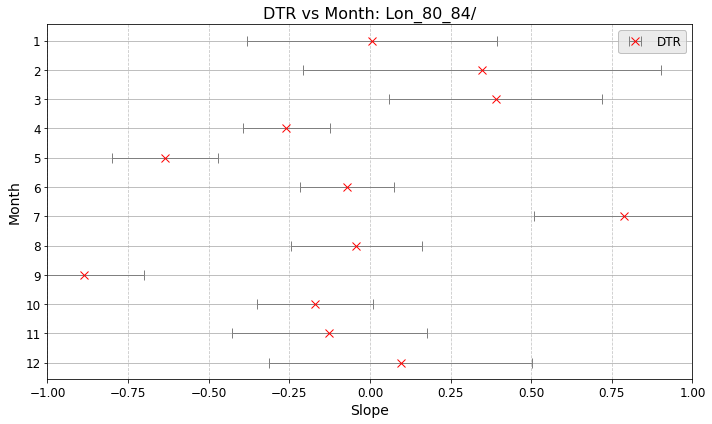

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.errorbar(
    parameters_TDiff['slope'], parameters_TDiff.index, color = 'r',
    xerr=parameters_TDiff['var'], fmt='x', capsize=5, ecolor='gray', elinewidth=1,
    markersize=8, markeredgecolor='r', markeredgewidth=1, label='DTR'
)

plt.xlabel('Slope')
plt.ylabel('Month')
plt.title('DTR vs Month: '+ name_breitengrad)

# Customize the tick labels and grid
plt.xticks(fontsize=12)
plt.yticks(parameters_TDiff.index, fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have January at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add a legend with a shadow
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('0.9')
frame.set_edgecolor('0.7')

plt.xlim(-1, 1)
plt.tight_layout()  # Adjust spacing
plt.savefig(name_region + name_breitengrad + name_Ordner_Fit + 'DTRperMonth.png', dpi = 300)
plt.show()

In [ ]:
# # Create the plot
# plt.figure(figsize=(10, 6))  # Adjust the figure size

# plt.errorbar(
#     parameters_TMax['slope'], parameters_TMax.index, color = 'r',
#     xerr=parameters_TMax['var'], fmt='x', capsize=5, ecolor='gray', elinewidth=1,
#     markersize=8, markeredgecolor='r', markeredgewidth=1, label='Slope with Error'
# )

# plt.xlabel('Slope')
# plt.ylabel('Month')
# plt.title('Slope vs Month with Error Bars')

# # Customize the tick labels and grid
# plt.xticks(fontsize=12)
# plt.yticks(parameters_TDiff.index, fontsize=12)
# plt.gca().invert_yaxis()  # Invert y-axis to have January at the top
# plt.grid(axis='x', linestyle='--', alpha=0.7)

# # Add a legend with a shadow
# legend = plt.legend()
# frame = legend.get_frame()
# frame.set_facecolor('0.9')
# frame.set_edgecolor('0.7')

# plt.tight_layout()  # Adjust spacing
# plt.show()

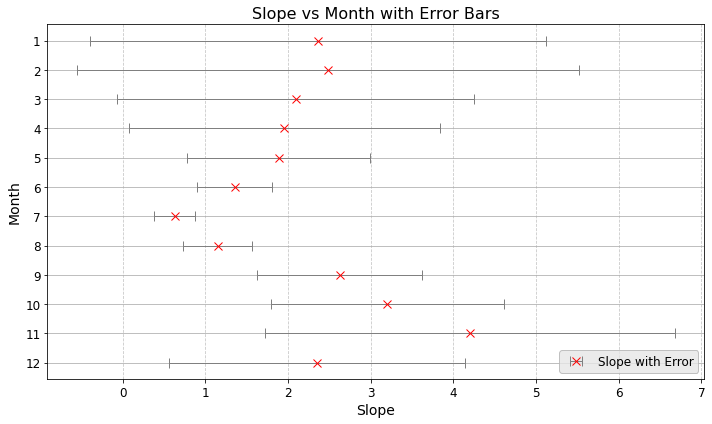

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.errorbar(
    parameters_TMin['slope'], parameters_TMin.index, color = 'r',
    xerr=parameters_TMin['var'], fmt='x', capsize=5, ecolor='gray', elinewidth=1,
    markersize=8, markeredgecolor='r', markeredgewidth=1, label='Slope with Error'
)

plt.xlabel('Slope')
plt.ylabel('Month')
plt.title('Slope vs Month with Error Bars')

# Customize the tick labels and grid
plt.xticks(fontsize=12)
plt.yticks(parameters_TDiff.index, fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have January at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add a legend with a shadow
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('0.9')
frame.set_edgecolor('0.7')

plt.tight_layout()  # Adjust spacing
plt.show()

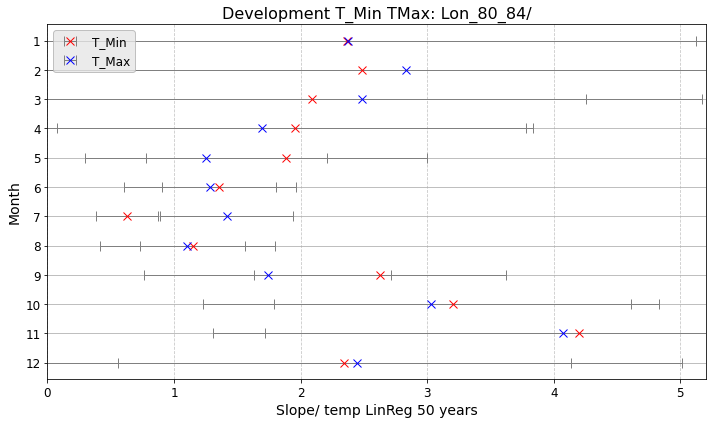

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.errorbar(
    parameters_TMin['slope'], parameters_TMin.index, color = 'r',
    xerr=parameters_TMin['var'], fmt='x', capsize=5, ecolor='gray', elinewidth=1,
    markersize=8, markeredgecolor='r', markeredgewidth=1, label='T_Min'
)

plt.errorbar(
    parameters_TMax['slope'], parameters_TMax.index, color = 'b',
    xerr=parameters_TMax['var'], fmt='x', capsize=5, ecolor='gray', elinewidth=1,
    markersize=8, markeredgecolor='b', markeredgewidth=1, label='T_Max'
)

plt.xlabel('Slope/ temp LinReg 50 years')
plt.ylabel('Month')
plt.title('Development T_Min TMax: '+ name_breitengrad)

# Customize the tick labels and grid
plt.xticks(fontsize=12)
plt.yticks(parameters_TDiff.index, fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have January at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add a legend with a shadow
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('0.9')
frame.set_edgecolor('0.7')

plt.xlim(0, 5.2)

plt.tight_layout()  # Adjust spacing
plt.savefig(name_region + name_breitengrad + name_Ordner_Fit + 'T_Min_T_Max.png', dpi = 300)
plt.show()

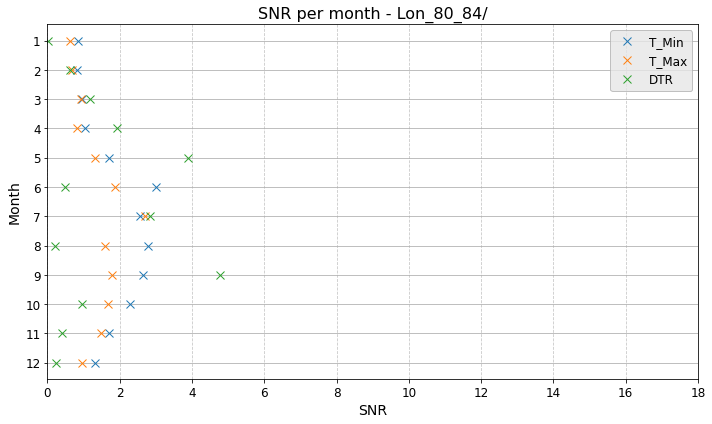

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.errorbar(
    parameters_TMin['SNR'], parameters_TMin.index,
    xerr=None, fmt='x', capsize=5, ecolor='gray', elinewidth=1,
    markersize=8,  markeredgewidth=1, label='T_Min'
)

plt.errorbar(
    parameters_TMax['SNR'], parameters_TMax.index, 
    xerr=None, fmt='x', capsize=5, ecolor='gray', elinewidth=1,
    markersize=8,  markeredgewidth=1, label='T_Max'
)

plt.errorbar(
    parameters_TDiff['SNR'], parameters_TDiff.index, 
    xerr=None, fmt='x', capsize=5, ecolor='gray', elinewidth=1,
    markersize=8,  markeredgewidth=1, label='DTR'
)


plt.xlabel('SNR')
plt.ylabel('Month')
plt.title('SNR per month - '+name_breitengrad)

# Customize the tick labels and grid
plt.xticks(fontsize=12)
plt.yticks(parameters_TDiff.index, fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have January at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add a legend with a shadow
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('0.9')
frame.set_edgecolor('0.7')

plt.xlim(0, 18)

plt.tight_layout()  # Adjust spacing
plt.savefig(name_region + name_breitengrad + name_Ordner_Fit + 'SNR.png',dpi = 300)
plt.show()

## FFT

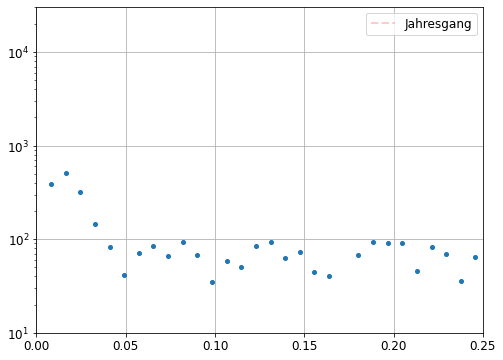

In [ ]:
lon_min = 70
lon_max = 75

signal = TMin_selection(lon_min,lon_max) - np.mean(TMin_selection(lon_min,lon_max))
# TMin_FT = np.fft.fft(signal,20000)
# # t = np.arange(len(signal))
# t  = np.arange(20000)
# freq = np.fft.fftfreq(len(t), d = 1/12)
# plt.plot(freq, np.abs(TMin_FT), ls = '', marker = '.')




# plt.axvline(x= 1, color='r', linestyle='--',alpha = 0.2, label='Jahresgang')
# plt.axvline(x= 2, color='r', linestyle='--',alpha = 0.2)
# plt.axvline(x= 3, color='r', linestyle='--',alpha = 0.2)
# plt.axvline(x= 4, color='r', linestyle='--',alpha = 0.2)
# plt.axvline(x= 5, color='r', linestyle='--',alpha = 0.2)



# plt.yscale('log')

# plt.xlim(0,1/4)
# plt.ylim(10,)


# plt.legend()
# plt.show()

TMin_FT = np.fft.fft(signal)
t = np.arange(len(signal))
# t  = np.arange(2000)
freq = np.fft.fftfreq(len(t), d = 1/12)
plt.plot(freq, np.abs(TMin_FT), ls = '', marker = '.')




plt.axvline(x= 1, color='r', linestyle='--',alpha = 0.2, label='Jahresgang')
plt.axvline(x= 2, color='r', linestyle='--',alpha = 0.2)
plt.axvline(x= 3, color='r', linestyle='--',alpha = 0.2)
plt.axvline(x= 4, color='r', linestyle='--',alpha = 0.2)
plt.axvline(x= 5, color='r', linestyle='--',alpha = 0.2)



plt.yscale('log')

plt.xlim(0,1/4)
plt.ylim(10,)


plt.legend()
plt.show()


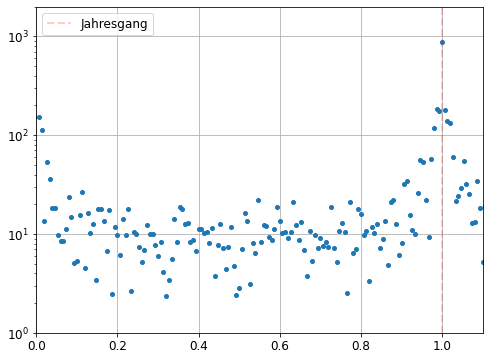

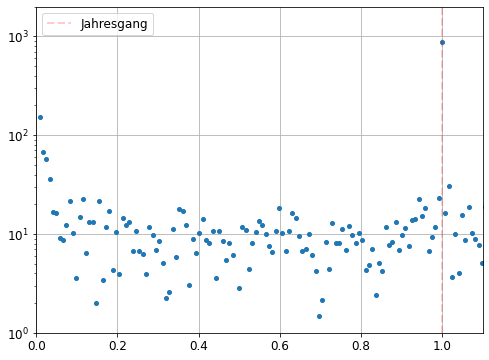

In [ ]:
lon_min = 70
lon_max = 75

signal = temperature_diff_selection(lon_min, lon_max) - np.mean(temperature_diff_selection(lon_min, lon_max))




TMin_FT = np.fft.fft(signal,1800)
#t = np.arange(len(signal))
t  = np.arange(1800)
freq = np.fft.fftfreq(len(t), d = 1/12)
plt.plot(freq, np.abs(TMin_FT), ls = '', marker = '.')




plt.axvline(x= 1, color='r', linestyle='--',alpha = 0.2, label='Jahresgang')
plt.axvline(x= 2, color='r', linestyle='--',alpha = 0.2)
plt.axvline(x= 3, color='r', linestyle='--',alpha = 0.2)
plt.axvline(x= 4, color='r', linestyle='--',alpha = 0.2)
plt.axvline(x= 5, color='r', linestyle='--',alpha = 0.2)



plt.yscale('log')

plt.xlim(0,1.1)
plt.ylim(1,2000)


plt.legend()
plt.show()

TMin_FT = np.fft.fft(signal)
t = np.arange(len(signal))
#t  = np.arange(2000)
freq = np.fft.fftfreq(len(t), d = 1/12)
plt.plot(freq, np.abs(TMin_FT), ls = '', marker = '.')




plt.axvline(x= 1, color='r', linestyle='--',alpha = 0.2, label='Jahresgang')
plt.axvline(x= 2, color='r', linestyle='--',alpha = 0.2)
plt.axvline(x= 3, color='r', linestyle='--',alpha = 0.2)
plt.axvline(x= 4, color='r', linestyle='--',alpha = 0.2)
plt.axvline(x= 5, color='r', linestyle='--',alpha = 0.2)



plt.yscale('log')

plt.xlim(0,1.1)
plt.ylim(1,2000)


plt.legend()
plt.show()


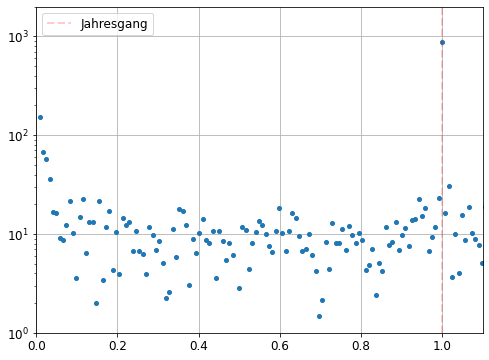

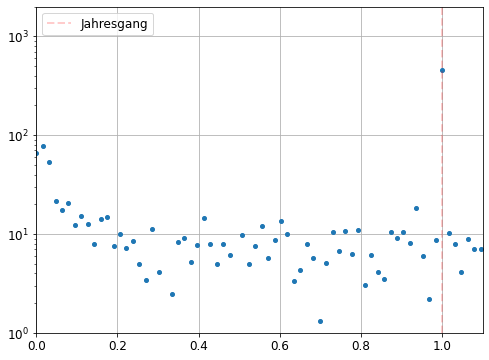

In [ ]:
lon_min = 70
lon_max = 75
t_start1 = '1900-01-16T00:00:00.000000000'
t_start2 = '1960-01-16T00:00:00.000000000'
t_end = '2023-01-16T00:00:00.000000000'

def fft_DTR(lon_min, lon_max, t_start, t_end):
    signal = temperature_diff_selection(lon_min, lon_max).sel(time = slice(t_start,t_end)) - np.mean(temperature_diff_selection(lon_min, lon_max))

    TMin_FT = np.fft.fft(signal)
    t = np.arange(len(signal))
    #t  = np.arange(2000)
    freq = np.fft.fftfreq(len(t), d = 1/12)
    plt.plot(freq, np.abs(TMin_FT), ls = '', marker = '.')




    plt.axvline(x= 1, color='r', linestyle='--',alpha = 0.2, label='Jahresgang')
    plt.axvline(x= 2, color='r', linestyle='--',alpha = 0.2)
    plt.axvline(x= 3, color='r', linestyle='--',alpha = 0.2)
    plt.axvline(x= 4, color='r', linestyle='--',alpha = 0.2)
    plt.axvline(x= 5, color='r', linestyle='--',alpha = 0.2)



    plt.yscale('log')

    plt.xlim(0,1.1)
    plt.ylim(1,2000)


    plt.legend()
    plt.show()

fft_DTR(lon_min, lon_max, t_start1, t_end)
fft_DTR(lon_min, lon_max, t_start2, t_end)


## Scatter plots

### Definitionen und Setup

In [ ]:
name_ordner_scatter = 'ScatterPlot/'
if not os.path.exists(name_region + name_breitengrad + name_ordner_scatter):
    os.mkdir(name_region + name_breitengrad + name_ordner_scatter)

In [ ]:
#Graphischen Layout
colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple', 'magenta', 'pink', 'brown', 'olive', 'gray']
month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

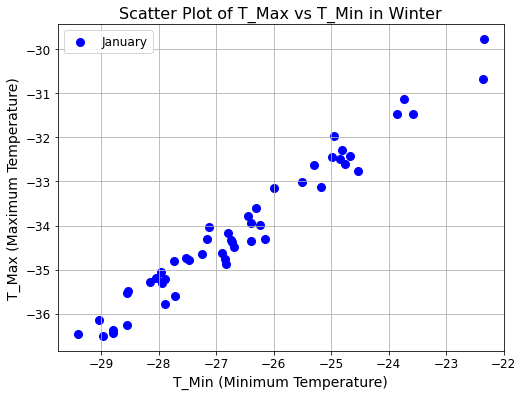

In [ ]:
month = 1
arr1 = TMax_selection(lon_min,lon_max)
arr2 = TMin_selection(lon_min,lon_max)
month = 1
# Select data
y_data1 = selecting_month(arr1,month, t_s_f, t_e)
y_data2 = selecting_month(arr2,month, t_s_f, t_e)
#Selecting fitting data

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_data1, y_data2, color='blue', label= month_label[month-1])
plt.title('Scatter Plot of T_Max vs T_Min in Winter')
plt.xlabel('T_Min (Minimum Temperature)')
plt.ylabel('T_Max (Maximum Temperature)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']
# month_label = ['January', 'February', 'March',...]

# plt.figure(figsize=(10, 8))

# for month in range(1, 13):
#     arr1 = TMax_selection(lon_min, lon_max)
#     arr2 = TMin_selection(lon_min, lon_max)

#     y_data1 = selecting_month(arr1, month, t_s_f, t_e)
#     y_data2 = selecting_month(arr2, month, t_s_f, t_e)

#     plt.scatter(y_data1, y_data2, color=colors[month - 1], label=f'Month {month_label}')

# plt.title('Scatter Plot of T_Max vs T_Min for All Months')
# plt.xlabel('T_Min (Minimum Temperature)')
# plt.ylabel('T_Max (Maximum Temperature)')
# plt.legend()
# plt.grid(True)
# plt.show()

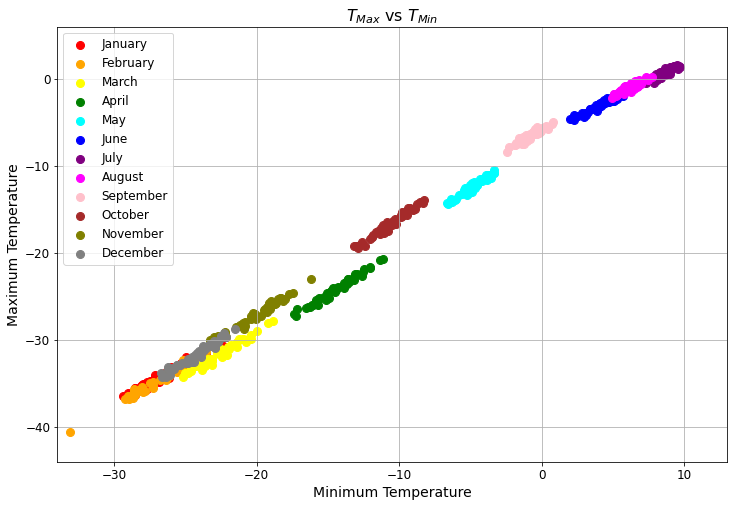

In [ ]:


plt.figure(figsize=(12, 8))

for month in range(1, 13):
    arr1 = TMax_selection(lon_min, lon_max)
    arr2 = TMin_selection(lon_min, lon_max)

    y_data1 = selecting_month(arr1, month, t_s_f, t_e)
    y_data2 = selecting_month(arr2, month, t_s_f, t_e)

    plt.scatter(y_data1, y_data2, color=colors[month - 1], label=month_label[month - 1])

plt.xlim(-34, 13)
plt.ylim(-44, 6)

plt.title('$T_{Max}$ vs $T_{Min}$')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.legend()
plt.grid(True)
plt.savefig(name_region + name_breitengrad + name_ordner_scatter +'ScatterTMinTMax.png',dpi =300)
plt.show()

In [ ]:
# %matplotlib inline
# month = 4
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# print(y_data1['time'].values)

# arr1 = TMax_selection(lon_min, lon_max)
# arr2 = TMin_selection(lon_min, lon_max)
# y_data1 = selecting_month(arr1, month, t_s_d, t_e)
# y_data2 = selecting_month(arr2, month, t_s_d, t_e)
# ax.scatter(y_data1, y_data2,1900*np.ones(len(y_data1))+range(len(y_data1)), color=colors[month - 1], label=month_label[month - 1])

# plt.title('Scatter Plot of T_Max vs T_Min for All Months')
# plt.xlabel('T_Min (Minimum Temperature)')
# plt.ylabel('T_Max (Maximum Temperature)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import animation


# colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']
# month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# month = 4
# fig = plt.figure(figsize=(10, 8))
# plt.title(f'Scatter Plot of T_Max vs T_Min for {month_label[month - 1]}')
# plt.xlabel('T_Min (Minimum Temperature)')
# plt.ylabel('T_Max (Maximum Temperature)')
# plt.grid(True)

# arr1 = TMax_selection(lon_min, lon_max)
# arr2 = TMin_selection(lon_min, lon_max)
# y_data1 = selecting_month(arr1, month, t_s_d, t_e)
# y_data2 = selecting_month(arr2, month, t_s_d, t_e)
# scatter = plt.scatter([], [], color=colors[month - 1], label=month_label[month - 1])

# def init():
#     return scatter,

# def animate(i):
#     if i < len(y_data1):
#         scatter.set_offsets(np.c_[y_data1[:i+1], y_data2[:i+1]])
#     return scatter,

# ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(y_data1), interval=1, blit=True)
# plt.legend()

# ani.save('test.gif')


In [ ]:
# # Your import statements here

# # Define your functions and variables here

# colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']
# month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# month = 4
# fig = plt.figure(figsize=(10, 8))
# plt.title(f'Scatter Plot of T_Max vs T_Min for {month_label[month - 1]}')
# plt.xlabel('T_Min (Minimum Temperature)')
# plt.ylabel('T_Max (Maximum Temperature)')
# plt.grid(True)

# # Define your data arrays here

# scatter = plt.scatter([], [], color=colors[month - 1], label=month_label[month - 1])

# def init():
#     return scatter,

# def animate(i):
#     if i < len(y_data1):
#         scatter.set_offsets(np.c_[x_data[:i+1], y_data[:i+1]])  # Update x_data and y_data accordingly
#     return scatter,

# ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(y_data1), interval=2, blit=True)  # Adjust interval as needed

# plt.legend()

# ani.save('test.gif', writer='imagemagick')  # Use 'imagemagick' writer for better compatibility
# plt.close()  # Close the animation to prevent memory leaks


### Hearmap

C:\Users\leonh\AppData\Local\Temp\ipykernel_22440\3728680422.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Temperature')


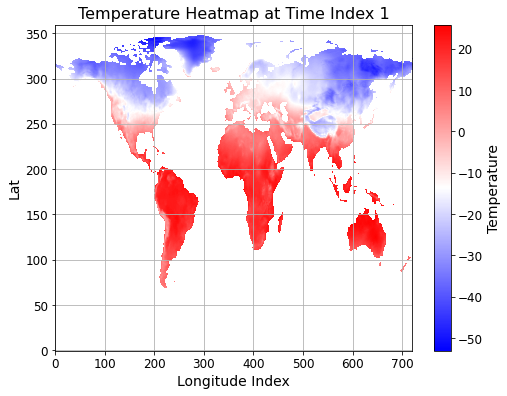

In [ ]:
time_index = 1
temperature_data = TMin.isel(time=time_index).tmn#,lon = range(0,260), lat = range(330,360)).tmn

plt.imshow(temperature_data, cmap='bwr', origin='lower', aspect='auto')
plt.colorbar(label='Temperature')
plt.title(f'Temperature Heatmap at Time Index {time_index}')
plt.xlabel('Longitude Index')
plt.ylabel('Lat')
plt.show()